In [5]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator, ParameterEstimator
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn import tree
import graphviz 

In [32]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator, BayesianEstimator


'''
Attribute Information:
   -- Only 14 used
      -- 1. #3  (age), age in years
      -- 2. #4  (sex), sex (1 = male; 0 = female)
      -- 3. #9  (cp), chest pain type
        -- Value 1: typical angina
        -- Value 2: atypical angina
        -- Value 3: non-anginal pain
        -- Value 4: asymptomatic
      -- 4. #10 (trestbps), resting blood pressure (in mm Hg on admission to the hospital)
      -- 5. #12 (chol), serum cholestoral in mg/dl
      -- 6. #16 (fbs), (fasting blood sugar > 120 mg/dl)  (1 = true; 0 = false)
      -- 7. #19 (restecg), restecg: resting electrocardiographic results
        -- Value 0: normal
        -- Value 1: having ST-T wave abnormality (T wave inversions and/or ST 
                    elevation or depression of > 0.05 mV)
        -- Value 2: showing probable or definite left ventricular hypertrophy
                    by Estes' criteria
      -- 8. #32 (thalach), maximum heart rate achieved
      -- 9. #38 (exang), exercise induced angina (1 = yes; 0 = no)
      -- 10. #40 (oldpeak), = ST depression induced by exercise relative to rest
      -- 11. #41 (slope), the slope of the peak exercise ST segment
        -- Value 1: upsloping
        -- Value 2: flat
        -- Value 3: downsloping   
      -- 12. #44 (ca), number of major vessels (0-3) colored by flourosopy
      -- 13. #51 (thal), 3 = normal; 6 = fixed defect; 7 = reversable defect 
      -- 14. #58 (num), (the predicted attribute) num: diagnosis of heart disease (angiographic disease status)
        -- Value 0: < 50% diameter narrowing
        -- Value 1: > 50% diameter narrowing
        (in any major vessel: attributes 59 through 68 are vessels)



10. Class Distribution:
        Database:      0   1   2   3   4 Total
          Cleveland: 164  55  36  35  13   303
          Hungarian: 188  37  26  28  15   294
        Switzerland:   8  48  32  30   5   123
      Long Beach VA:  51  56  41  42  10   200


TODO: * Check if there is a -9 in the dataset because it is stated that this would be the marker for a missing value.
      * Check for occurences of ?
'''



column_names = [
    'age',
    'sex',
    'cp',
    'trestbps',
    'chol',
    'fbs',
    'restecg',
    'thalach',
    'exang',
    'oldpeak',
    'slope',
    'ca',
    'thal', 
    'num'
]

df = pd.read_csv("data/processed.cleveland.data", header = None, names = column_names)

# Removing non-numeric values
for column in column_names:
    # pandas.to_numeric return type depends on input. Series if Series, otherwise ndarray
    # If ‘coerce’, then invalid parsing will be set as NaN
    df = df[pd.to_numeric(df[column], errors='coerce').notnull()]

df


#model = BayesianModel([('age', 'num'), ('sex', 'num')])

#pe = ParameterEstimator(model, df)
#print( pe.state_counts('sex'))  # unconditional
#print( pe.state_counts('num'))  # conditional on fruit and size
# Learing CPDs using Maximum Likelihood Estimators
#model.fit(df, estimator=MaximumLikelihoodEstimator)
#for cpd in model.get_cpds():
#    print("CPD of {variable}:".format(variable=cpd.variable))
#    print(cpd)

#print(df.isnull().sum())
#df.applymap(np.isreal)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [33]:
df.to_csv("data/processed.cleveland_wmissingvalues.data", header = None)

In [34]:
data = df.iloc[:, 13]
data2= df.iloc[:, :13]

In [43]:
from sklearn import tree
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data2,data, test_size=0.1)

#classifier = tree.DecisionTreeClassifier(max_depth=3,min_samples_split=2, class_weight='balanced')
#classifier = tree.DecisionTreeClassifier(class_weight='balanced')
classifier = tree.DecisionTreeClassifier()
classifier.fit(X_train, y_train)
#classifier.predict(X_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

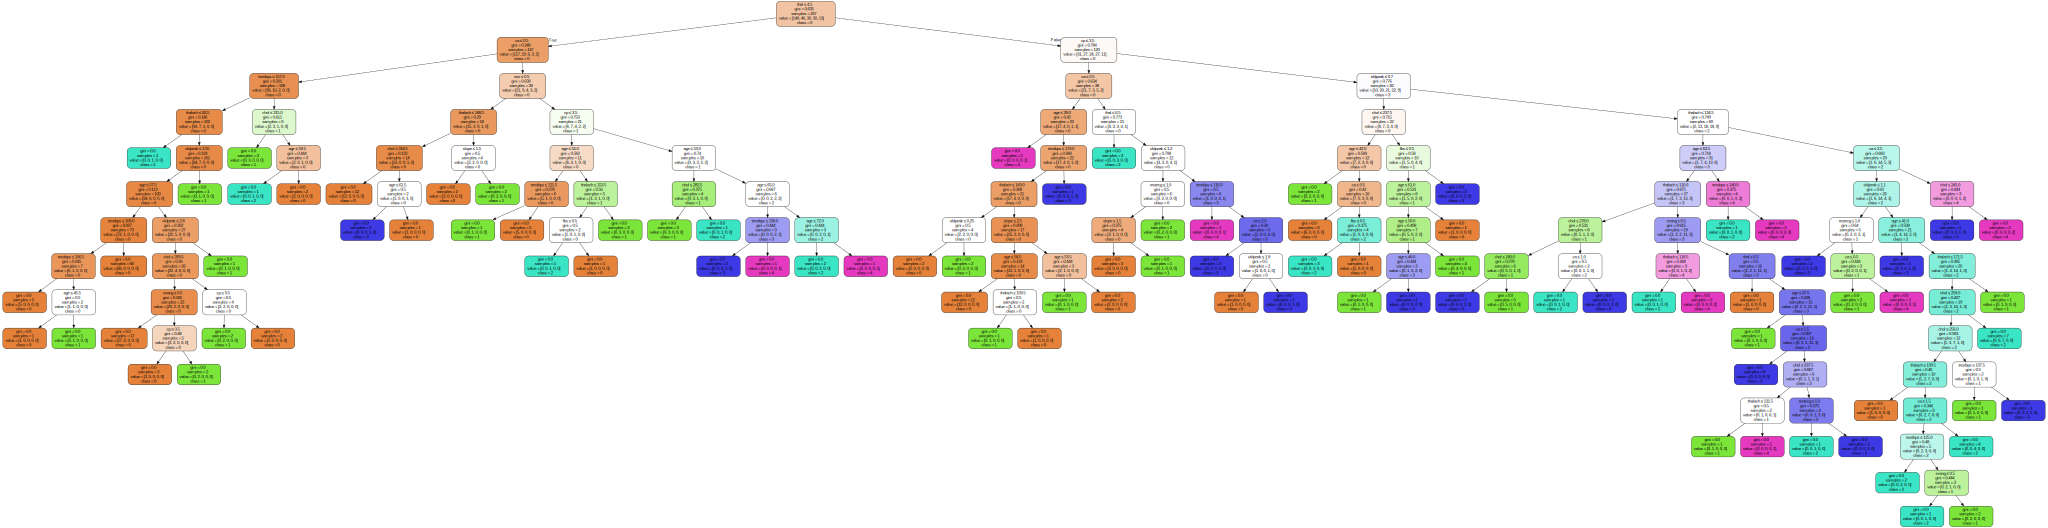

In [44]:
dot_data = tree.export_graphviz(classifier, out_file=None, feature_names=column_names[0:13],  
                         class_names=['0','1','2','3','4'],  
                         filled=True, rounded=True,  
                         special_characters=True)

graph = graphviz.Source(dot_data)  
graph.render("HeartDisease")
graph 

In [45]:
#classifier.predict(X_test)
classifier.predict_proba(X_test)

array([[ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.],
       [ 1.,  0.,  0.,  0.,  0.],
       [ 1.,  

In [46]:
classifier.score(X_test, y_test)

0.43333333333333335

### Tree for continuous variables to determinine cut

In [49]:
# For trestbps
data = df.iloc[:, 13]
data2= df.iloc[:, 3]

In [51]:
Xtrain, Xtest = df[:238], df[238:]

In [54]:
#Computing joint probabilities
#Gets probabilites from df, as in the pgmpy notebook, but why not Xtrain.
joint_prob = df.groupby(column_names).size() / len(Xtrain)
joint_prob

age   sex  cp   trestbps  chol   fbs  restecg  thalach  exang  oldpeak  slope  ca   thal  num
29.0  1.0  2.0  130.0     204.0  0.0  2.0      202.0    0.0    0.0      1.0    0.0  3.0   0      0.004202
34.0  0.0  2.0  118.0     210.0  0.0  0.0      192.0    0.0    0.7      1.0    0.0  3.0   0      0.004202
      1.0  1.0  118.0     182.0  0.0  2.0      174.0    0.0    0.0      1.0    0.0  3.0   0      0.004202
35.0  0.0  4.0  138.0     183.0  0.0  0.0      182.0    0.0    1.4      1.0    0.0  3.0   0      0.004202
      1.0  2.0  122.0     192.0  0.0  0.0      174.0    0.0    0.0      1.0    0.0  3.0   0      0.004202
           4.0  120.0     198.0  0.0  0.0      130.0    1.0    1.6      2.0    0.0  7.0   1      0.004202
                126.0     282.0  0.0  2.0      156.0    1.0    0.0      1.0    0.0  7.0   1      0.004202
37.0  0.0  3.0  120.0     215.0  0.0  0.0      170.0    0.0    0.0      1.0    0.0  3.0   0      0.004202
      1.0  3.0  130.0     250.0  0.0  0.0      187.0    0.

In [55]:
#Gets probabilites from df, as in the pgmpy notebook, but why not Xtrain.
#Only probabilities of non continuous variables
joint_prob = df.groupby(['sex','cp','fbs','restecg', 'exang', 'slope', 'ca','thal' ,'num']).size() / len(Xtrain)
joint_prob

sex  cp   fbs  restecg  exang  slope  ca   thal  num
0.0  1.0  0.0  0.0      0.0    1.0    0.0  3.0   0      0.004202
                                      2.0  3.0   0      0.004202
                               3.0    0.0  3.0   0      0.004202
          1.0  2.0      0.0    1.0    0.0  3.0   0      0.004202
     2.0  0.0  0.0      0.0    1.0    0.0  3.0   0      0.021008
                                      1.0  3.0   0      0.004202
                                      2.0  3.0   0      0.008403
                               2.0    0.0  3.0   0      0.008403
               2.0      0.0    1.0    0.0  3.0   0      0.004202
                               2.0    0.0  3.0   0      0.012605
                                      1.0  3.0   1      0.004202
                        1.0    1.0    1.0  3.0   0      0.004202
          1.0  2.0      0.0    1.0    2.0  3.0   3      0.004202
                        1.0    1.0    1.0  3.0   0      0.004202
     3.0  0.0  0.0      0.0    1.0   

In [56]:
# Predicting values

# Selecting just the feature variables.
X_test_features = Xtest.iloc[:, :13].values
X_test_actual_results = Xtest.iloc[:, 13].values
X_test_actual_results = X_test_actual_results.T
predicted_values = []


for i in X_test_features:
    #Joint probability for all of the features, doesn't reduce data.
    #predicted_values.append(np.argmax(joint_prob[i[0], i[1], i[2], i[3], i[4], i[5], i[6], i[7], i[8], i[9], i[10], i[11], i[12] ]))
    predicted_values.append(np.argmax(joint_prob[i[1], i[2], i[5], i[6], i[8], i[10], i[11], i[12] ]))
predicted_values = np.array(predicted_values)
predicted_values

C:\Users\lisab\Anaconda2\lib\site-packages\numpy\core\fromnumeric.py:57: FutureWarning: 'argmax' is deprecated. Use 'idxmax' instead. The behavior of 'argmax' will be corrected to return the positional maximum in the future. Use 'series.values.argmax' to get the position of the maximum now.
  return getattr(obj, method)(*args, **kwds)


array([0, 0, 2, 0, 0, 2, 1, 3, 0, 0, 1, 3, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0, 0,
       1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 3, 0, 3, 0, 2, 4, 2, 0,
       0, 0, 0, 2, 2, 1, 0, 3, 1, 1, 2, 3, 1], dtype=int64)

In [57]:
predicted_values == X_test_actual_results


array([ True,  True,  True,  True, False,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True, False, False,  True, False,
        True,  True,  True, False,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True, False,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True], dtype=bool)

In [58]:
score = float((predicted_values == X_test_actual_results).sum()) / np.size(predicted_values)
print(score)

0.847457627119


In [3]:
###Worst Case Bayesian Network Model

In [8]:
model = BayesianModel([('age', 'num'), ('sex', 'num'), ('cp', 'num'), ('trestbps' ,'num'), ('chol' ,'num'), ('fbs','num'), ('restecg','num'), ('thalach','num'), ('exang','num'), ('oldpeak','num'), ('slope','num'), ('ca','num'), ('thal','num')])

In [59]:
pe = ParameterEstimator(model, df)
print( pe.state_counts('sex'))  # unconditional


     sex
0.0   96
1.0  201
